<a href="https://colab.research.google.com/github/sachinkun21/HuggingFace_Chapters/blob/main/Chapter_3_Anatomy_of_a_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction:
While a deep technical understanding of the Transformer architecture is generally not necessary to use nlpt_pin01 Transformers and fine-tune models for your use case, it can be helpful for comprehending and navigating the limitations of transformers and using them in new domains.

In this chapter we’ll explore the main building blocks of transformer models and how to implement them using PyTorch. We’ll also provide guidance on how to do the same in TensorFlow. We’ll first focus on building the attention mechanism, and then add the bits and pieces necessary to make a transformer encoder work. We’ll also have a brief look at the architectural differences between the encoder and decoder modules. By the end of this chapter you will be able to implement a simple transformer model yourself!


the original Transformer is based on the encoder-decoder architecture that is widely used for tasks like machine translation, where a sequence of words is translated from one language to another. This architecture consists of two components:

1. Encoder:


    Converts an input sequence of tokens into a sequence of embedding vectors, often called the hidden state or context

2. Decoder


    Uses the encoder’s hidden state to iteratively generate an output sequence of tokens, one token at a time


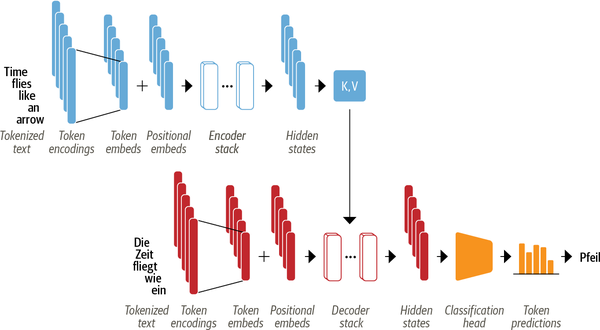

Encoder-decoder architecture of the transformer, with the encoder shown in the upper half of the figure and the decoder in the lower half

### The working of Original Transformer architecture can be explained as follow:

- The input text is tokenized and converted to token embeddings using the techniques. Since the attention mechanism is not aware of the relative positions of the tokens, we need a way to inject some information about token positions into the input to model the sequential nature of text. The token embeddings are thus combined with positional embeddings that contain positional information for each token.

- The encoder is composed of a stack of encoder layers or “blocks,” which is analogous to stacking convolutional layers in computer vision. The same is true of the decoder, which has its own stack of decoder layers.

- The encoder’s output is fed to each decoder layer, and the decoder then generates a prediction for the most probable next token in the sequence. The output of this step is then fed back into the decoder to generate the next token, and so on until a special end-of-sequence (EOS) token is reached. In the example from Figure above, imagine the decoder has already predicted “Die” and “Zeit”. Now it gets these two as an input as well as all the encoder’s outputs to predict the next token, “fliegt”. In the next step the decoder gets “fliegt” as an additional input. We repeat the process until the decoder predicts the EOS token or we reached a maximum length.

The Transformer architecture was originally designed for sequence-to-sequence tasks like machine translation, but both the encoder and decoder blocks were soon adapted as standalone models. Although there are hundreds of different transformer models, most of them belong to one of three types:

- **Encoder-only**

    These models convert an input sequence of text into a rich numerical representation that is well suited for tasks like text classification or named entity recognition. BERT and its variants, like RoBERTa and DistilBERT, belong to this class of architectures. The representation computed for a given token in this architecture depends both on the left (before the token) and the right (after the token) contexts. This is often called bidirectional attention.

- **Decoder-only**

    Given a prompt of text like “Thanks for lunch, I had a…” these models will auto-complete the sequence by iteratively predicting the most probable next word. The family of GPT models belong to this class. The representation computed for a given token in this architecture depends only on the left context. This is often called causal or autoregressive attention.

- **Encoder-decoder**

    These are used for modeling complex mappings from one sequence of text to another; they’re suitable for machine translation and summarization tasks. In addition to the Transformer architecture, which as we’ve seen combines an encoder and a decoder, the BART and T5 models belong to this class.


`Note: In reality, the distinction between applications for decoder-only versus encoder-only architectures is a bit blurry. For example, decoder-only models like those in the GPT family can be primed for tasks like translation that are conventionally thought of as sequence-to-sequence tasks. Similarly, encoder-only models like BERT can be applied to summarization tasks that are usually associated with encoder-decoder or decoder-only models.`


Now that you have a high-level understanding of the Transformer architecture, let’s take a closer look at the inner workings of the encoder.



## The Encoder:
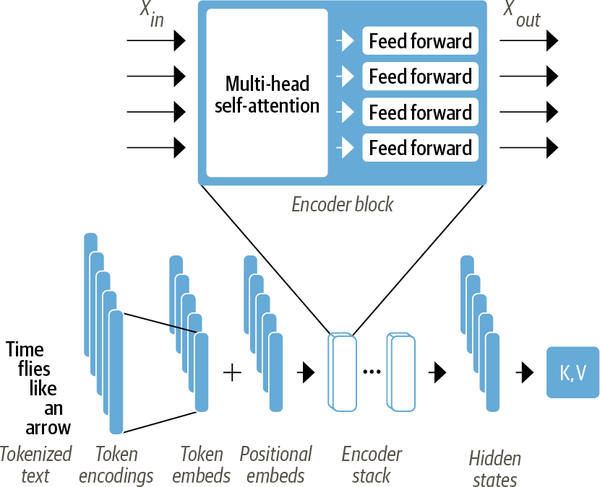







As we saw earlier, the transformer’s encoder consists of many encoder layers stacked next to each other. As illustrated in Figure above, each encoder layer receives a sequence of embeddings and feeds them through the following sublayers:

  - A multi-head self-attention layer

  - A fully connected feed-forward layer that is applied to each input embedding

The output embeddings of each encoder layer have the same size as the inputs, and we’ll soon see that the main role of the encoder stack is to “update” the input embeddings to produce representations that encode some contextual information in the sequence. For example, the word “apple” will be updated to be more “company-like” and less “fruit-like” if the words “keynote” or “phone” are close to it.

Each of these sublayers also uses skip connections and layer normalization, which are standard tricks to train deep neural networks effectively.
Let's dig deeper to understand the Encoder building block.

We will start with the most important building block: the self-attention layer.